In [1]:
!pip install yellowbrick



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Configuración para visualizaciones
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Configuración para visualizaciones
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar los datos
try:
    # CORRECCIÓN: Usamos index_col=0 para que la primera columna del CSV se use como índice,
    # en lugar de ser cargada como una columna de datos más.
    X_train = pd.read_csv('processed_data/X_train.csv', index_col=0)
    X_test = pd.read_csv('processed_data/X_test.csv', index_col=0)
    y_train = pd.read_csv('processed_data/y_train.csv', index_col=0)
    y_test = pd.read_csv('processed_data/y_test.csv', index_col=0)

    # Combinar train y test para el clustering
    X = pd.concat([X_train, X_test], ignore_index=True)
    y = pd.concat([y_train, y_test], ignore_index=True)

    print("Forma de X_train:", X_train.shape)
    print("Forma de X_test:", X_test.shape)
    print("Forma del dataset combinado X:", X.shape)
    
    # Ahora 'y' debería tener una sola columna.
    # Le asignamos un nombre claro para la interpretación final.
    if not y.columns.empty:
        y.columns = ['Suicide_rate_per_100k'] # Ajusta este nombre si es diferente
        data_full = pd.concat([X, y], axis=1)
    else:
        data_full = X.copy()

    print("\nPrimeras 5 filas del dataset completo:")
    print(data_full.head())

except FileNotFoundError as e:
    print(f"Error: No se encontraron los archivos de datos procesados.")
    print(f"Detalle: {e}")
    print("Asegúrate de haber ejecutado el notebook de EDA y preprocesamiento primero.")
    # Detener la ejecución si no hay datos
    X = pd.DataFrame()


Forma de X_train: (660, 6)
Forma de X_test: (165, 6)
Forma del dataset combinado X: (825, 6)

Primeras 5 filas del dataset completo:
   unnamed:_1  \
0        2010   
1        2000   
2        2010   
3        2000   
4        2016   

   probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease  \
0                                               19.4                                                                                               
1                                               28.9                                                                                               
2                                               23.0                                                                                               
3                                               26.8                                                                                               
4                       

# Encontrar el número óptimo de clusters (K)
Usaremos dos métodos populares: el método del codo (inercia) y el puntaje de silueta.

# Método del Codo (Inercia) 

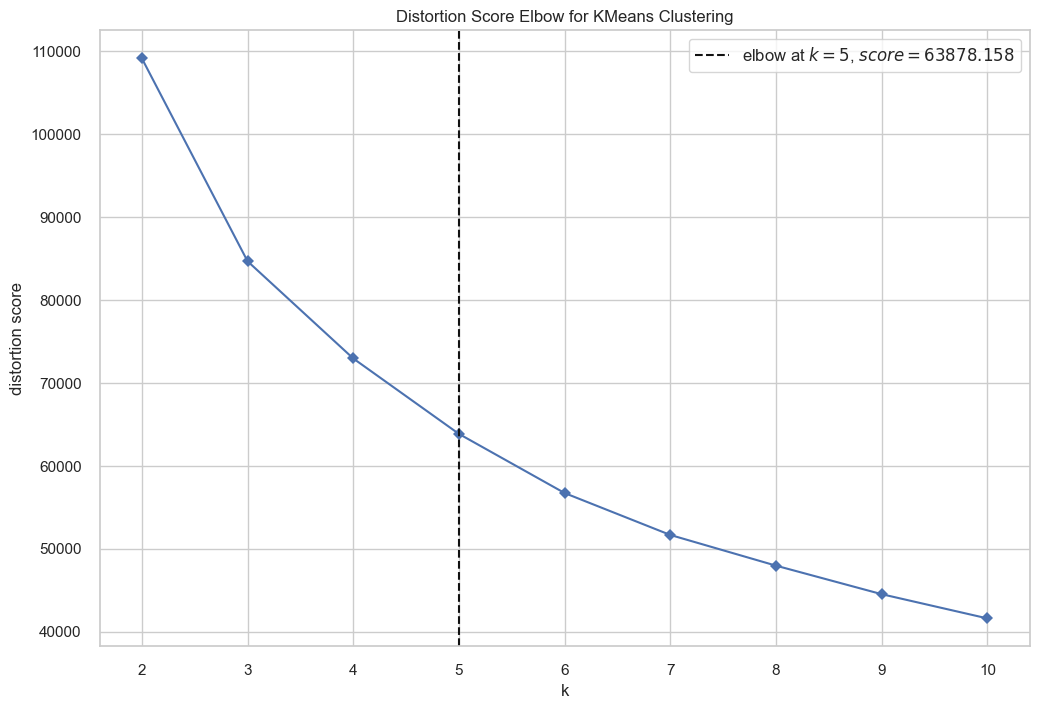

El valor óptimo de k según el método del codo es: 5


In [4]:
if not X.empty:
    # Instanciar el modelo KMeans y el visualizador KElbowVisualizer
    # CORRECCIÓN: La métrica 'inertia' se llama 'distortion' en Yellowbrick
    model = KMeans(random_state=42, n_init=10)
    visualizer = KElbowVisualizer(model, k=(2, 11), metric='distortion', timings=False)

    # Ajustar los datos al visualizador
    visualizer.fit(X)
    
    # Mostrar la gráfica
    visualizer.show()
    print(f"El valor óptimo de k según el método del codo es: {visualizer.elbow_value_}")

# Puntaje de Silueta 

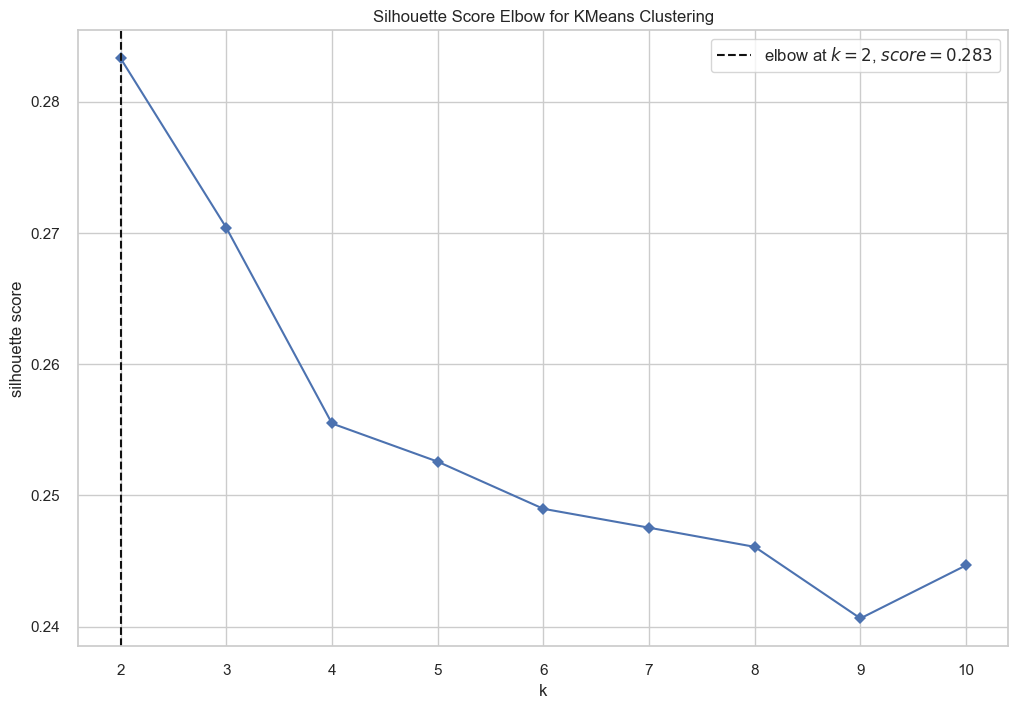

El valor óptimo de k según el puntaje de silueta es: 2


In [5]:
if not X.empty:
    # Usar KElbowVisualizer con la métrica de silueta
    model = KMeans(random_state=42, n_init=10)
    visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=False)

    # Ajustar y mostrar
    visualizer.fit(X)
    visualizer.show()
    print(f"El valor óptimo de k según el puntaje de silueta es: {visualizer.elbow_value_}")

# Entrenar el modelo final y visualizar los clusters
Basado en los gráficos anteriores, elige el mejor valor para k. Por ejemplo, si el codo está en 4 y la silueta es máxima en 4, usaremos k=4.

Entrenando el modelo final con k = 2...

Distribución de datos por cluster:
Cluster
0    429
1    396
Name: count, dtype: int64


C:\Users\josue\UNI\Proyecto Ia\Analisis-de-datos\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


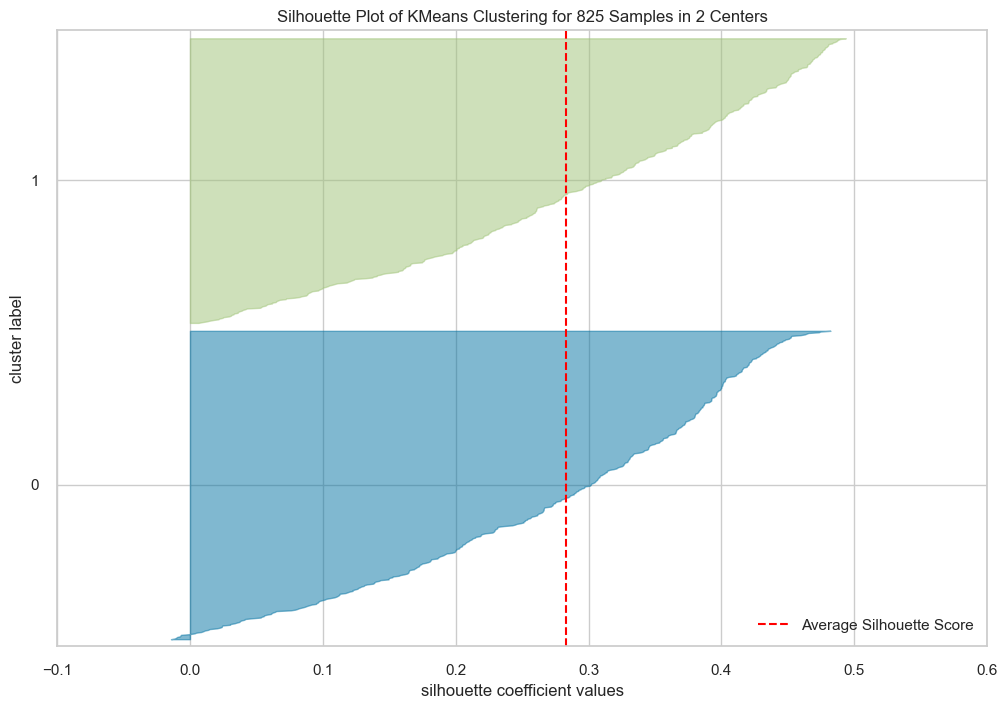

In [6]:
if not X.empty:
    # Reemplaza 'k_optimo' con el valor que determinaste en el paso anterior
    k_optimo = visualizer.elbow_value_ # Usamos el valor del último visualizador (silueta)
    
    print(f"Entrenando el modelo final con k = {k_optimo}...")

    # Entrenar el modelo KMeans final
    final_model = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
    final_model.fit(X)

    # Obtener las etiquetas de los clusters
    cluster_labels = final_model.labels_
    
    # Agregar las etiquetas al DataFrame
    data_full['Cluster'] = cluster_labels
    
    print("\nDistribución de datos por cluster:")
    print(data_full['Cluster'].value_counts())

    # Visualizar los clusters con SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(final_model, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

 Análisis e Interpretación de los Clusters


Análisis de Características por Cluster (Valores Medios):
          unnamed:_1  \
Cluster                
0        2007.769231   
1        2011.128788   

         probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease  \
Cluster                                                                                                                                                  
0                                                24.557576                                                                                               
1                                                15.513889                                                                                               

         probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1  \
Cluster                                                                

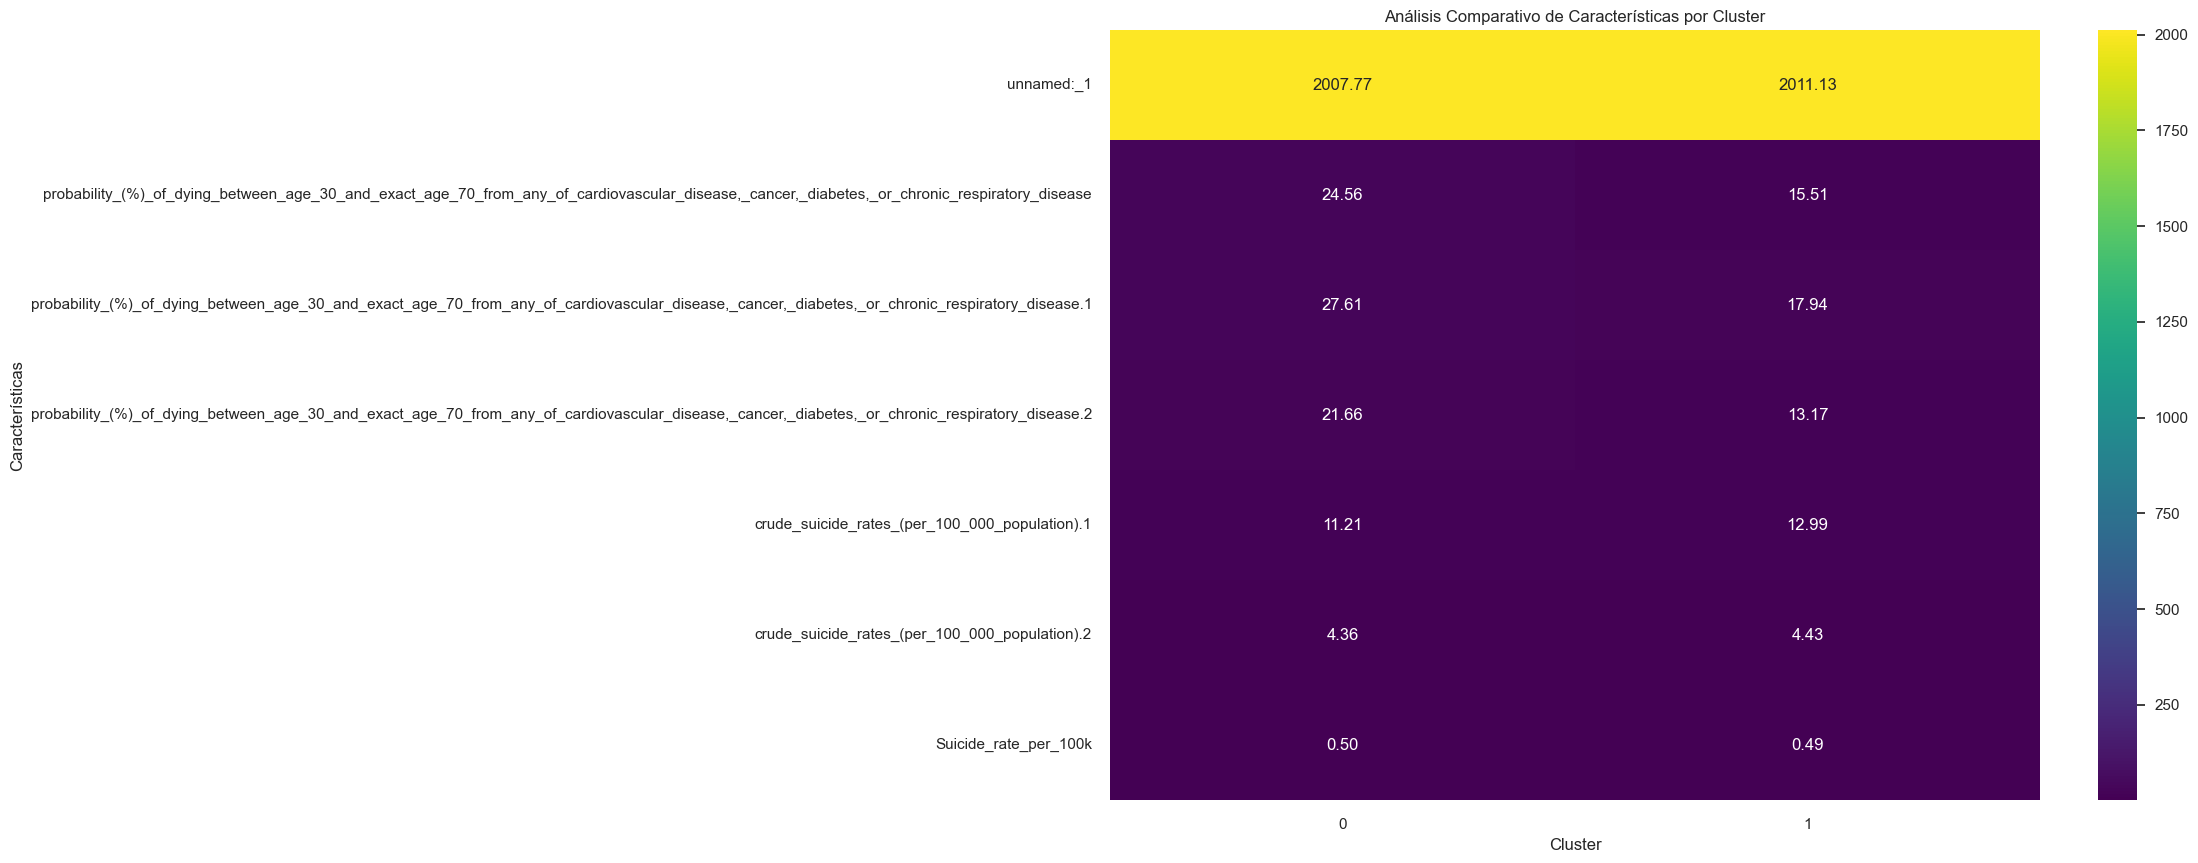

In [7]:
if not X.empty:
    # Calcular la media de cada característica por cluster
    cluster_analysis = data_full.groupby('Cluster').mean()

    print("\nAnálisis de Características por Cluster (Valores Medios):")
    print(cluster_analysis)

    # Visualizar las medias de las características para cada cluster
    plt.figure(figsize=(15, 10))
    sns.heatmap(cluster_analysis.T, annot=True, fmt=".2f", cmap="viridis")
    plt.title('Análisis Comparativo de Características por Cluster')
    plt.ylabel('Características')
    plt.xlabel('Cluster')
    plt.show()

Conclusiones y Análisis

In [8]:
if not X.empty:
    print("--- Análisis Final por Cluster ---")
    for i in range(k_optimo):
        print(f"\n--- Cluster {i} ---")
        print(f"Número de países/regiones en este cluster: {data_full[data_full['Cluster'] == i].shape[0]}")
        
        # Obtener las estadísticas del cluster
        cluster_stats = cluster_analysis.loc[i]
        
        # Aquí escribes tu interpretación basada en las estadísticas.
        # Este es un ejemplo genérico, debes adaptarlo a tus variables.
        
        # Ejemplo de interpretación para la tasa de suicidios
        tasa_suicidio_media = cluster_stats.get('Suicide_rate_per_100k', 'N/A')
        if tasa_suicidio_media != 'N/A':
            print(f"Tasa de suicidio media: {tasa_suicidio_media:.2f} por 100k habitantes.")
            if tasa_suicidio_media > data_full['Suicide_rate_per_100k'].mean():
                print("Interpretación: Este grupo presenta una tasa de suicidios SUPERIOR a la media general. Podría representar una población de ALTO RIESGO.")
            else:
                print("Interpretación: Este grupo presenta una tasa de suicidios INFERIOR a la media general. Podría representar una población de BAJO RIESGO.")

        # Ejemplo de interpretación para otra variable (ajusta el nombre)
        # Por ejemplo, si tienes una variable 'Alcohol_disorder_prevalence'
        if 'Alcohol_disorder_prevalence' in cluster_stats.index:
            alcohol_prev = cluster_stats['Alcohol_disorder_prevalence']
            if alcohol_prev > data_full['Alcohol_disorder_prevalence'].mean():
                 print("Comportamiento: Prevalencia de desórdenes por alcohol ALTA.")
            else:
                 print("Comportamiento: Prevalencia de desórdenes por alcohol BAJA.")

        # Agrega más análisis para cada variable importante...
        print("\nRecomendación/Observación para el médico:")
        print("Basado en las características, este cluster podría representar a [describe el perfil, ej: 'poblaciones jóvenes con alto estrés y acceso a sustancias' o 'poblaciones mayores con sistemas de salud deficientes']. Se recomienda enfocar las intervenciones en [sugiere una acción, ej: 'programas de salud mental preventiva' o 'mejora del acceso a tratamiento'].")

--- Análisis Final por Cluster ---

--- Cluster 0 ---
Número de países/regiones en este cluster: 429
Tasa de suicidio media: 0.50 por 100k habitantes.
Interpretación: Este grupo presenta una tasa de suicidios SUPERIOR a la media general. Podría representar una población de ALTO RIESGO.

Recomendación/Observación para el médico:
Basado en las características, este cluster podría representar a [describe el perfil, ej: 'poblaciones jóvenes con alto estrés y acceso a sustancias' o 'poblaciones mayores con sistemas de salud deficientes']. Se recomienda enfocar las intervenciones en [sugiere una acción, ej: 'programas de salud mental preventiva' o 'mejora del acceso a tratamiento'].

--- Cluster 1 ---
Número de países/regiones en este cluster: 396
Tasa de suicidio media: 0.49 por 100k habitantes.
Interpretación: Este grupo presenta una tasa de suicidios INFERIOR a la media general. Podría representar una población de BAJO RIESGO.

Recomendación/Observación para el médico:
Basado en las carac

In [9]:
import joblib
import os

# Crear el directorio si no existe
os.makedirs('model', exist_ok=True)

# Guardar el modelo
if 'final_model' in locals():
    model_path = 'model/clustering_model.joblib'
    joblib.dump(final_model, model_path)
    print(f"Modelo guardado exitosamente en: {model_path}")
else:
    print("Error: El objeto 'final_model' no fue encontrado. Asegúrate de ejecutar las celdas anteriores.")

Modelo guardado exitosamente en: model/clustering_model.joblib
